<a href="https://colab.research.google.com/github/Nekokan1500/Machine-Learning/blob/main/DataPrep/Example_Image_Processing_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

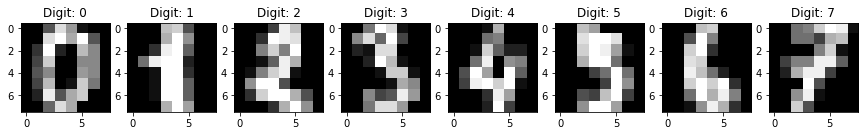

In [8]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()

def display_img(img, target, ax):
  img = img.reshape((8,8))
  ax.imshow(img, cmap='gray')
  ax.set_title(f'Digit: {str(target)}')
  ax.grid(False)

fig, axs = plt.subplots(1,8,figsize=(15,10))
for i in range(8):
  display_img(digits['data'][i], digits['target'][i], axs[i])

Accuracy score: 0.98


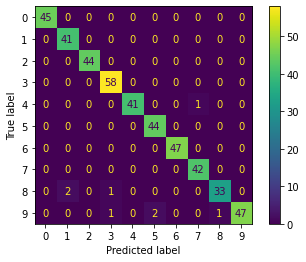

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

x, y = digits['data'], digits['target']
x_train, x_test, y_train, y_test = train_test_split(x,y)

clf = KNeighborsClassifier(n_neighbors=11, metric='manhattan')
clf.fit(x_train, y_train)
y_test_pred = clf.predict(x_test)
print("Accuracy score: %.2f" % accuracy_score(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [10]:
import pandas as pd
from sklearn.metrics import DistanceMetric

points = pd.DataFrame([[1,2],[4,6]], columns=['x1','x2'])
p_list = [1,2,10,50,100]
d = [(p, DistanceMetric.get_metric('minkowski', p=p).pairwise(points)[0][-1]) for p in p_list]
ds = [x[1] for x in d]

In [4]:
from sklearn.metrics.pairwise import (
    euclidean_distances,
    manhattan_distances,
    cosine_distances
)

# Manhattan and Euclidean distance is not scale-invariant
d0 = manhattan_distances([1.0*digits['data'][0], 2.0*digits['data'][0]])[0,1]
print("Manhattan distance: %.2f" % d0)
d1 = euclidean_distances([1.0*digits['data'][0], 2.0*digits['data'][0]])[0,1]
print("Euclidean distance: %.2f" % d1)
# Cosine distance is scale-invariant
d2 = cosine_distances([1.0*digits['data'][0], 2.0*digits['data'][0]])[0,1]
print("Cosine distance: %.2f" % d2)

Manhattan distance: 294.00
Euclidean distance: 55.41
Cosine distance: 0.00


In [5]:
# Explore optimal parameters with cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

parameters = {
    'metric': ('manhattan','euclidean','cosine'),
    'n_neighbors': range(1, 21)
}

knn = KNeighborsClassifier()
gscv = GridSearchCV(knn, param_grid=parameters, scoring='accuracy')

gscv.fit(x_train, y_train)

y_test_pred = gscv.predict(x_test)
print(accuracy_score(y_test, y_test_pred))
print(gscv.best_params_)

0.9844444444444445
{'metric': 'euclidean', 'n_neighbors': 3}


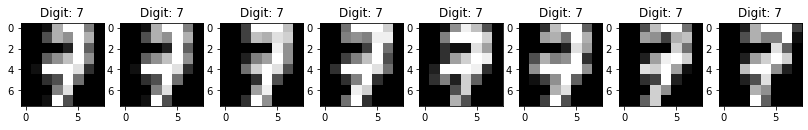

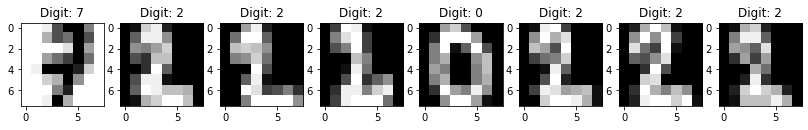

In [18]:
# Using custom distances
clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf.fit(x_train, y_train)
y_train_pred = clf.predict(x_train)

fig, axs = plt.subplots(1,8,figsize=(14,5))
display_img(x_train[0], y_train[0], axs[0])

_, kneighbors_index = clf.kneighbors(
    [x_train[0]], n_neighbors=7, return_distance=True
)

for i, neighbor_index in enumerate(kneighbors_index[0], 1):
  display_img(x_train[neighbor_index],y_train[neighbor_index],axs[i])

x_train_inv = x_train.max() - x_train

img_inv = x_train_inv[0]
fig, axs = plt.subplots(1,8,figsize=(14,5))
display_img(img_inv, y_train[0], axs[0])

_, kneighbors_index_inv = clf.kneighbors(
    [x_train_inv[0]], n_neighbors=7, return_distance=True
)

for i, neighbor_index in enumerate(kneighbors_index_inv[0], 1):
  display_img(x_train[neighbor_index],y_train[neighbor_index],axs[i])

[[  0 450 298 155 720 280 825]]


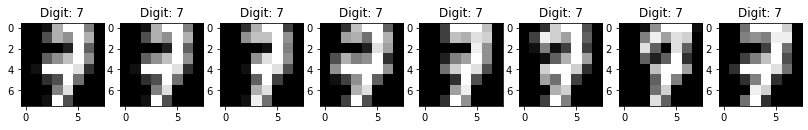

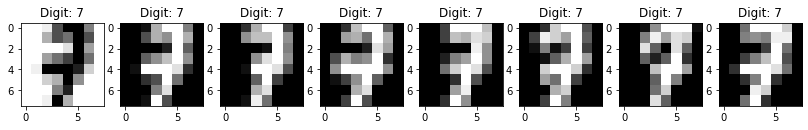

In [19]:
# Define a custom distance that is invariant of pixel inversion
from sklearn.metrics.pairwise import euclidean_distances

def contrast_distance(x1, x2):
  _x1, _x2 = np.abs(8 - x1), np.abs(8 - x2)
  d = euclidean_distances([_x1], [_x2])
  return d[0][0]

clf = KNeighborsClassifier(n_neighbors=3, metric=contrast_distance)
clf.fit(x_train, x_train)

fig, axs = plt.subplots(1,8,figsize=(14,5))
display_img(x_train[0], y_train[0], axs[0])

_, kneighbors_index = clf.kneighbors(
    [x_train[0]], n_neighbors=7, return_distance=True
)

for i, neighbor_index in enumerate(kneighbors_index[0], 1):
  display_img(x_train[neighbor_index],y_train[neighbor_index],axs[i])

fig, axs = plt.subplots(1,8,figsize=(14,5))
display_img(img_inv, y_train[0], axs[0])

_, kneighbors_index_inv = clf.kneighbors(
    [x_train_inv[0]], n_neighbors=7, return_distance=True
)

for i, neighbor_index in enumerate(kneighbors_index_inv[0], 1):
  display_img(x_train[neighbor_index],y_train[neighbor_index],axs[i])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

clf = KNeighborsRegressor(n_neighbors=3, metric='euclidean')
clf.fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

pd.DataFrame({
    'y_test': y_test,
    'y_test_pred': y_test_pred
})

,y_test,y_test_pred
0,7,7.0
1,0,0.0
2,5,5.0
3,9,9.0
4,6,6.0
...,...,...
445,2,2.0
446,1,1.0
447,8,8.0
448,9,9.0


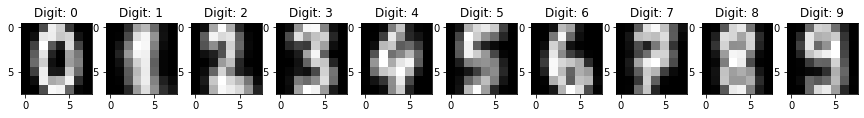

In [ ]:
# Testing of nearest centroid classifier
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid(metric='euclidean')
clf.fit(x_train, y_train)

fig, axs = plt.subplots(1, len(clf.classes_), figsize=(15,5))

for i, (centroid, label) in enumerate(zip(clf.centroids_, clf.classes_)):
  display_img(centroid, label, axs[i])

fig.show()

[[ 0.72525803]
 [ 1.65682968]
 [-1.46242264]
 [ 2.01393358]
 [-1.87244269]
 [ 0.6059329 ]
 [-1.62363796]
 [-0.0434509 ]]


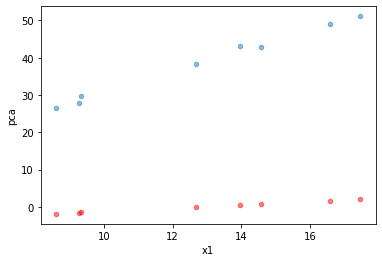

In [21]:
# Principal Component Analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df= pd.DataFrame(
    {
        'x1': np.random.normal(loc=10,scale=5,size=8),
        'noise': np.random.normal(loc=0,scale=1,size=8)
    }
)
df['x2'] = 3*df['x1'] + df['noise']

scaler = StandardScaler()
x = scaler.fit_transform(df[['x1','x2']])
pca = PCA(n_components=1)
x_new = pca.fit_transform(x)
print(x_new)
df['pca'] = x_new
fig,ax = plt.subplots(1,1,figsize=(6,4))
df.plot.scatter(x='x1',y='x2',alpha=0.5,ax=ax)
df.plot.scatter(x='x1',y='pca',color='r',alpha=0.5,ax=ax)

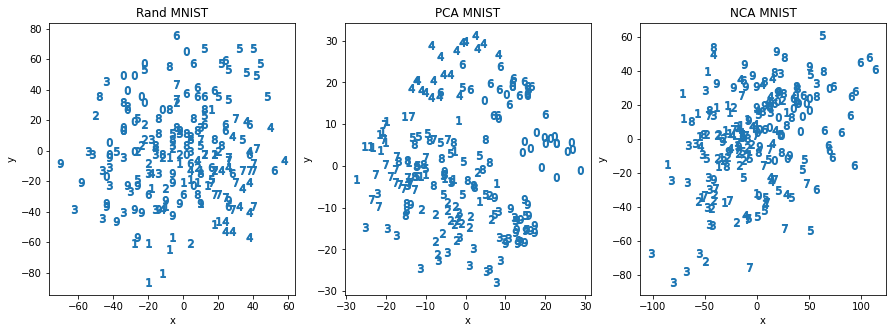

In [ ]:
# comparison of PCA and NCA
from sklearn.random_projection import SparseRandomProjection
from sklearn.neighbors import NeighborhoodComponentsAnalysis

methods = {
    'Rand': SparseRandomProjection(n_components=2),
    'PCA': PCA(n_components=2),
    'NCA': NeighborhoodComponentsAnalysis(n_components=2,init='random')
}

fig,axs = plt.subplots(1,3,figsize=(15,5))
for i, (method_name, method_obj) in enumerate(methods.items()):
  scaler = StandardScaler(with_std=False)
  x_train_scaled = scaler.fit_transform(x_train)
  method_obj.fit(x_train_scaled, y_train)
  x_train_2d = method_obj.transform(x_train_scaled)
  for target in set(y_train):
    pd.DataFrame(x_train_2d[y_train == target],
                 columns=['y','x']).sample(n=20).plot(
                     kind='scatter', x='x', y='y',
                     marker=f'${target}$', s=64,ax=axs[i])
    axs[i].set_title(f'{method_name} MNIST')



In [ ]:
# Use PCA to fit image data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

x, y = digits['data'], digits['target']
x_train, x_test, y_train, y_test = train_test_split(x,y)

scaler = StandardScaler(with_std=False)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

pca = PCA(n_components=32)
pca.fit(x_train_scaled, y_train)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.fit_transform(x_test_scaled)

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_pca)
x_test_scaled = scaler.transform(x_test_pca)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

parameters = {'metric':('manhattan','euclidean'), 'n_neighbors': range(3, 9)}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid=parameters, scoring='accuracy', cv=5)
clf.fit(x_train_scaled, y_train)
y_test_pred = clf.predict(x_test_scaled)
print('MNIST test accuracy score: {:.1%} [k={}, metric={} - {}]'.format(
  accuracy_score(y_test, y_test_pred),
  clf.best_params_['n_neighbors'],
  clf.best_params_['metric'],
  'PCA'
)
)


MNIST test accuracy score: 17.3% [k=3, metric=euclidean - PCA]


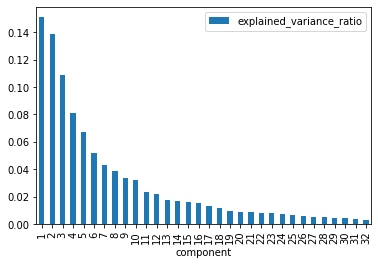

In [ ]:
# Picking the most informative components
df_explained_variance_ratio = pd.DataFrame(
    [(component, explained_variance_ratio) for component, explained_variance_ratio in 
     enumerate(pca.explained_variance_ratio_[:32],1)],
     columns=['component', 'explained_variance_ratio']
).plot.bar(x='component',y='explained_variance_ratio')

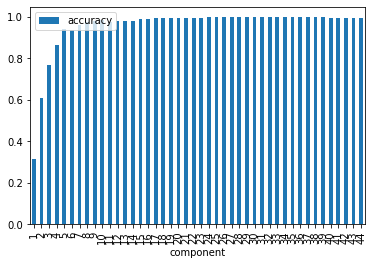

In [31]:
# Finding optimal number of principal components
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler(with_std=False)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

clf = KNeighborsClassifier(n_neighbors=3, metric="euclidean")

accuracy_scores = []

for n in range(1,45):
  pca = PCA(n_components=n)
  pca.fit(x_train, y_train)
  x_train_pca = pca.transform(x_train_scaled)
  x_test_pca = pca.transform(x_test_scaled)
  clf.fit(x_train_pca, y_train)
  y_test_pred = clf.predict(x_test_pca)
  accuracy_scores.append((n,accuracy_score(y_test,y_test_pred)))

df = pd.DataFrame(accuracy_scores,columns=['component', 'accuracy'])
df.plot.bar(x='component', y='accuracy')

In [35]:
n_components = df[df['accuracy'] == df['accuracy'].max()]
print(n_components)

    component  accuracy
29         30  0.997778


Text(0.5, 1.0, 'Pixels kept when 75% removed')

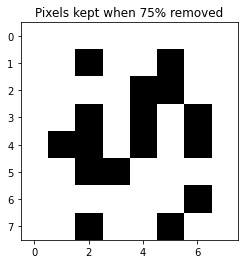

In [37]:
# Finding the most informative pixels
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(x_train, y_train)
percent_to_remove = 75
mi_threshold = np.quantile(mi, 0.01*percent_to_remove)
informative_pixels = (mi >= mi_threshold).reshape((8,8))

plt.imshow(informative_pixels, cmap='Greys')
plt.title(f'Pixels kept when {percent_to_remove}% removed')

In [40]:
from sklearn.feature_selection import SelectPercentile

percent_to_keep = 100 - percent_to_remove
selector = SelectPercentile(mutual_info_classif,percentile=percent_to_keep)

x_train_mi = selector.fit_transform(x_train, y_train)
x_test_mi = selector.transform(x_test)

clf = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
clf.fit(x_train_mi, y_train)
y_test_pred = clf.predict(x_test_mi)
print("Accuracy: %.2f" % accuracy_score(y_test,y_test_pred))

Accuracy: 0.96
